#Kaggle dataset download
##Reqd - remove temp and use only rainfall, go through code to verify every step is executed perfectly, save all the models(or just rfe) 

In [3]:
from google.colab import files
files.upload() #uploading api

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"apoorvb","key":"ea102443c4fe13d54fd20e037c3e8b02"}'}

In [4]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c acea-water-prediction

  0% 0.00/364k [00:00<?, ?B/s]
100% 364k/364k [00:00<00:00, 49.8MB/s]
  0% 0.00/100k [00:00<?, ?B/s]
100% 100k/100k [00:00<00:00, 89.6MB/s]
  0% 0.00/431k [00:00<?, ?B/s]
100% 431k/431k [00:00<00:00, 60.6MB/s]
  0% 0.00/40.1k [00:00<?, ?B/s]
100% 40.1k/40.1k [00:00<00:00, 33.1MB/s]
  0% 0.00/256k [00:00<?, ?B/s]
100% 256k/256k [00:00<00:00, 75.9MB/s]
  0% 0.00/475k [00:00<?, ?B/s]
100% 475k/475k [00:00<00:00, 151MB/s]
  0% 0.00/457k [00:00<?, ?B/s]
100% 457k/457k [00:00<00:00, 151MB/s]
  0% 0.00/10.2k [00:00<?, ?B/s]
100% 10.2k/10.2k [00:00<00:00, 10.5MB/s]
  0% 0.00/75.2k [00:00<?, ?B/s]
100% 75.2k/75.2k [00:00<00:00, 72.3MB/s]
  0% 0.00/901k [00:00<?, ?B/s]
100% 901k/901k [00:00<00:00, 127MB/s]
  0% 0.00/258k [00:00<?, ?B/s]
100% 258k/258k [00:00<00:00, 72.0MB/s]


In [6]:
mv * /content/

mv: 'Aquifer_Auser.csv' and '/content/Aquifer_Auser.csv' are the same file
mv: 'Aquifer_Doganella.csv' and '/content/Aquifer_Doganella.csv' are the same file
mv: 'Aquifer_Luco.csv' and '/content/Aquifer_Luco.csv' are the same file
mv: 'Aquifer_Petrignano.csv' and '/content/Aquifer_Petrignano.csv' are the same file
mv: 'datasets_description.ods' and '/content/datasets_description.ods' are the same file
mv: 'datasets_description.xlsx' and '/content/datasets_description.xlsx' are the same file
mv: 'drive' and '/content/drive' are the same file
mv: 'kaggle.json' and '/content/kaggle.json' are the same file
mv: 'Lake_Bilancino.csv' and '/content/Lake_Bilancino.csv' are the same file
mv: 'River_Arno.csv' and '/content/River_Arno.csv' are the same file
mv: 'sample_data' and '/content/sample_data' are the same file
mv: 'Water_Spring_Amiata.csv' and '/content/Water_Spring_Amiata.csv' are the same file
mv: 'Water_Spring_Lupa.csv' and '/content/Water_Spring_Lupa.csv' are the same file
mv: 'Water_

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
!pip install odfpy 
from statsmodels.tsa.stattools import adfuller

     |████████████████████████████████| 727kB 9.4MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160691 sha256=e4e84d925e8bdfbf4a4a5d91e24a671bdb622be1445db968ffab5d55413af954
  Stored in directory: /root/.cache/pip/wheels/ce/6b/93/ec330f2991c5f1546abf640360e5a2022f76cb16e5d99ed2fd
Successfully built odfpy


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

#RIVER - temp isnt an important variable, rfe's 6 variables most effective so far

##EDA

In [10]:
river = pd.read_csv('River_Arno.csv')
river.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [11]:
river = river.dropna().reset_index()

In [12]:
river['Date'] = pd.to_datetime(river['Date'], dayfirst=True)
river.head()

,index,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,2191,2004-01-01,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84
1,2192,2004-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93
2,2193,2004-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61
3,2194,2004-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35
4,2195,2004-01-05,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44


In [ ]:
river.describe()

,index,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.00000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,2830.576803,2.867555,2.377429,2.362853,3.097806,2.255486,3.035737,2.54953,3.431818,2.090752,2.081975,2.428213,2.105956,2.519592,3.842947,16.047688,1.490282
std,369.675465,7.404714,6.458453,6.193672,8.201614,5.890147,8.537043,6.51870,8.960505,5.888406,6.335634,7.245808,6.391857,7.123253,9.614272,7.255555,0.557755
min,2191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.700000,0.980000
25%,2510.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.250000,1.090000
50%,2830.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.200000,1.335000
75%,3149.250000,0.800000,0.400000,0.800000,1.400000,0.800000,1.000000,1.00000,2.200000,0.400000,0.400000,0.650000,0.400000,0.800000,2.400000,21.900000,1.660000
max,3473.000000,56.000000,54.600000,53.800000,108.600000,50.400000,95.000000,63.00000,114.400000,56.600000,75.000000,123.200000,95.600000,77.400000,103.600000,30.950000,5.660000


In [ ]:
river['total_rain'] = river.iloc[:,2:16].sum(axis=1)

Text(0.5, 1.0, 'Correlation among the variables')

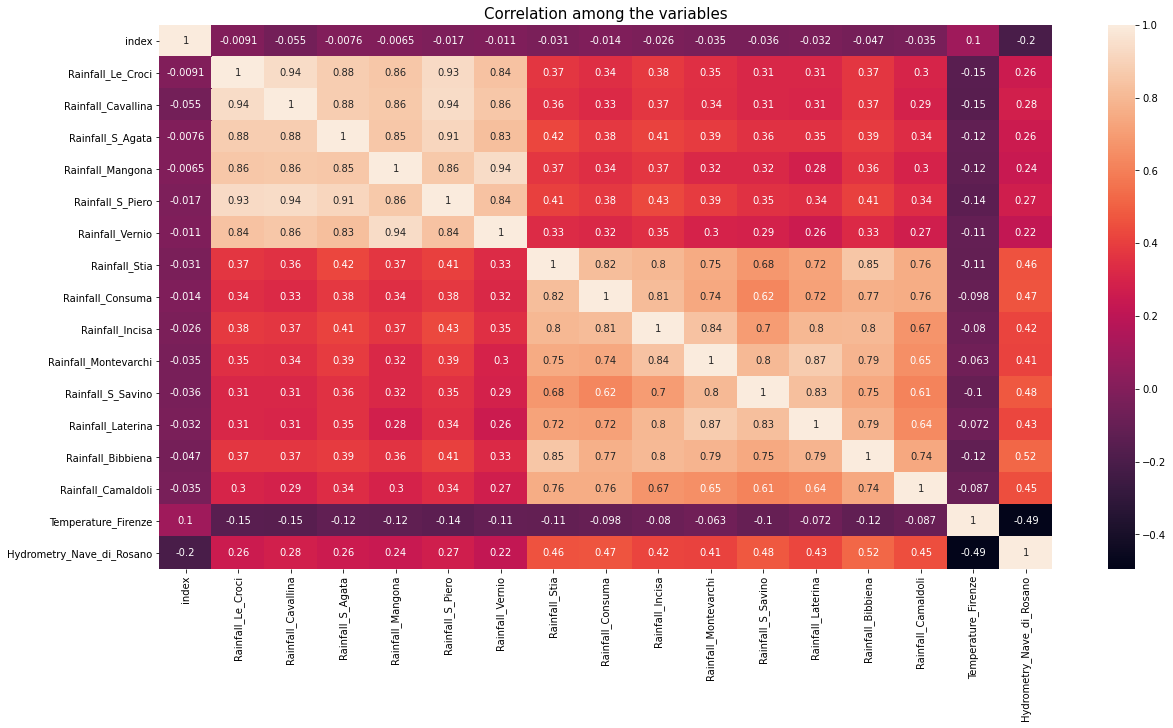

In [9]:
correlation = river.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title("Correlation among the variables", size=15)

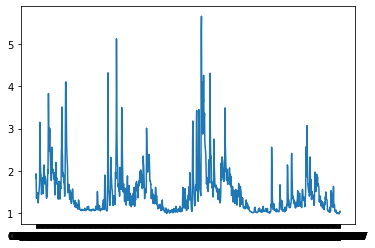

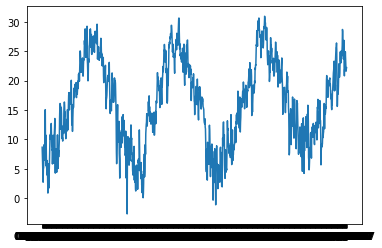

In [14]:
plt.figure()
plt.plot(river['Date'], river['Hydrometry_Nave_di_Rosano'])
plt.figure()
plt.plot(river['Date'], river['Temperature_Firenze'])
plt.show()
#river.plot(x='Date', y=['Temperature_Firenze','Hydrometry_Nave_di_Rosano'], kind='scatter', figsize=(10,5), subplots=True)

Not to be used. just for refernce. How to run 3d plotting

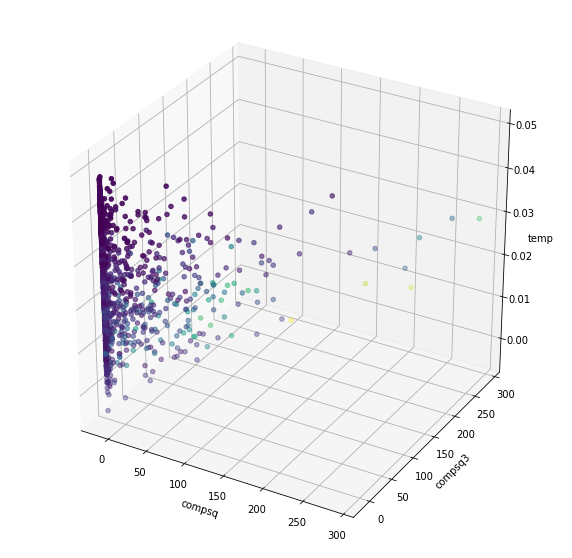

In [ ]:
###3D PLOTTING
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

fig = plt.figure(1,(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('compsq')
plt.ylabel('compsq3')
ax.set_zlabel('temp')
xval = np.array(analysis['comp_1'])
yval = np.array(analysis['comp_1'])
zval = preprocessing.normalize([np.array(analysis['Temperature_Firenze'])])
#zval = np.array(analysis['compsq2'])
ax.scatter(xval,yval,zval,
               c=analysis['Hydrometry_Nave_di_Rosano'])

## LSTM
day,week,fortnight,month,lstm

###feature grouping

####Features with ~0.5 corr with Hydro

In [56]:
col = (river.iloc[:,1:].corrwith(river['Hydrometry_Nave_di_Rosano'], axis=0) > 0.4
 ) | (
     river.iloc[:,1:].corrwith(river['Hydrometry_Nave_di_Rosano'], axis=0) < -0.4)

In [98]:
features = river.iloc[:,2:].loc[:,list(col)].copy().to_numpy()
target = river['Hydrometry_Nave_di_Rosano'].copy().to_numpy()

In [15]:
print(features.shape, target.shape)

(1276, 10) (1276,)


982.52

#####PCA feature reduction - >0.4 corr

continued from previous features, targets


In [331]:
features = features[:,:-2]
features.shape

(1276, 8)

In [332]:
scaler_rain = StandardScaler()
scaled_feat = scaler_rain.fit_transform(features)

In [336]:
from sklearn.decomposition import PCA
# getting pca of combined rainfalls
pca = PCA(n_components=3)
components = pca.fit(scaled_feat)
print(sum(components.explained_variance_ratio_.round(2)))
#------------------
components = pca.fit_transform(scaled_feat)

0.9000000000000001


In [337]:
features = np.concatenate((components, river[['Temperature_Firenze']].copy().to_numpy(),
                               river[['Hydrometry_Nave_di_Rosano']].copy().to_numpy(), ),
                              axis=1) 

##### tree regressor feature importance

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
features, target

In [60]:
features.shape

(1276, 10)

In [71]:
estimator = RandomForestRegressor(n_estimators=500, random_state=1)
estimator.fit(features, features[:,-1])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [72]:
estimator.feature_importances_

array([1.51193937e-03, 2.22924226e-03, 2.77377242e-04, 7.77630133e-04,
       7.93607210e-05, 1.03499172e-03, 6.93446969e-04, 5.62739050e-04,
       2.03714396e-04, 9.92629558e-01])

In [ ]:
#taking features 1st, 2nd, sixth and last

In [85]:
features = np.concatenate((features[:,:2], 
                           np.expand_dims(features[:,5], axis=1),
                           np.expand_dims(features[:,-1], axis=1)), axis=1)

In [87]:
target = features[:,-1]

#####RFE feature selection


In [99]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [113]:
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=6)
fit = rfe.fit(features, target)

In [114]:
for i in range(fit.support_.shape[0]):
	if fit.support_[i]:
		print(names[i])

Rainfall_Stia
Rainfall_Consuma
Rainfall_Montevarchi
Rainfall_Laterina
Rainfall_Bibbiena
Hydrometry_Nave_di_Rosano


In [119]:
features = river.iloc[:,-10:].loc[:,list(fit.support_)].copy().to_numpy()
target = river.iloc[:,-1].copy().to_numpy()

####f regression 

In [134]:
from sklearn.feature_selection import f_regression, mutual_info_regression

In [141]:
features = river.iloc[:,2:].copy().to_numpy()
target = river.iloc[:,2:].iloc[:,-1].copy().to_numpy()

array([0. , 0.2, 0. , ..., 0. , 0. , 0. ])

In [142]:
f_test,_ = f_regression(features,target)

In [143]:
f_test

array([ 9.04961835e+01,  1.06652895e+02,  8.86060104e+01,  8.01294201e+01,
        1.00539763e+02,  6.56590196e+01,  3.37777100e+02,  3.53546456e+02,
        2.68262787e+02,  2.60689321e+02,  3.79267106e+02,  2.85608994e+02,
        4.77950866e+02,  3.21273396e+02,  4.11671967e+02, -1.91252864e+17])

In [144]:
features = np.concatenate((
   features[:,-10:-8], 
   np.expand_dims(features[:,-6], axis=1),
   features[:,-4:],
),axis=1)

In [145]:
target = features[:,-1]

####mutual info

In [151]:
features = river.iloc[:,2:].copy().to_numpy()
target = river.iloc[:,2:].iloc[:,-1].copy().to_numpy()

In [152]:
mi = mutual_info_regression(features, target)

In [153]:
mi

array([0.03664021, 0.05035054, 0.02431337, 0.06197697, 0.0325398 ,
       0.03400087, 0.10963412, 0.09810947, 0.11841637, 0.09096031,
       0.09648054, 0.10223706, 0.12902899, 0.08645912, 0.42951439,
       4.67925479])

In [154]:
features = np.concatenate((
   np.expand_dims(features[:,-8], axis=1),
   np.expand_dims(features[:,-10], axis=1),
   features[:,-5:-3],
   features[:,-2:] 
),axis=1)

In [155]:
target = features[:,-1]

####Hydro only

In [49]:
features = river[['Hydrometry_Nave_di_Rosano']].copy().to_numpy()
target = river[['Hydrometry_Nave_di_Rosano']].copy().to_numpy()

###model - training and predicting

In [ ]:
#get features and targets

In [156]:
x, xtest, y, ytest = train_test_split(features, target, test_size=0.3,
                                                shuffle=False)


In [157]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
xtrain, xval, ytrain, yval = train_test_split(x, x[:,-1], test_size=0.1,
                                                shuffle=False)

In [158]:
xtest = scaler.transform(xtest)
ytest = xtest[:,-1]

In [91]:
lags = [6,13,29]

In [159]:
#model_corr = {} # > 0.5 correlation model
#model_pca = {} # > 0.5 correlation rainfall pca components
#model_hydro = {}
#model_tree = {}
#model_rfe = {}
#model_f = {}
model_m = {}
for len in lags:
  train_generator = TimeseriesGenerator(xtrain, ytrain, length=len, sampling_rate=1, batch_size=32)
  val_generator = TimeseriesGenerator(xval, yval, length=len, sampling_rate=1, batch_size=32)
  test_generator = TimeseriesGenerator(xtest, ytest, length=len, sampling_rate=1, batch_size=1)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(64, activation='relu', input_shape=(len, xtrain.shape[1]), return_sequences=False))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Dense(1))

  model.summary()

  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min'
  )


  model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()]
  )


  history = model.fit(train_generator,
                    epochs=20,
                    validation_data=val_generator,
                    shuffle=False,
                    callbacks=[early_stopping])
  
  ypred = model.predict(test_generator)
  
  pred = np.repeat(ypred, xtrain.shape[1], axis=1)
  test = np.repeat(np.expand_dims(test_generator.targets[-(ytest.shape[0]-len):],axis=1), 
                              xtrain.shape[1], axis=1)
  scale_1 = scaler.inverse_transform(pred)
  scale_2 = scaler.inverse_transform(test)

  model_m[len] = {}
  model_m[len]['history'] = history
  model_m[len]['forecast'] = pd.DataFrame({'pred': scale_1[:,-1], 'test': scale_2[:,-1]})

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 64)                18176     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 18,241
Trainable params: 18,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
25/25 [==============================] - 2s 19ms/step - loss: 0.7797 - mean_absolute_error: 0.6243 - val_loss: 0.1275 - val_mean_absolute_error: 0.3015
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.4691 - mean_absolute_error: 0.4448 - val_loss: 0.0625 - val_mean_absolute_error: 0.2087
Epoch 3/20
25/25 [==============================] - 0s

### model plottings

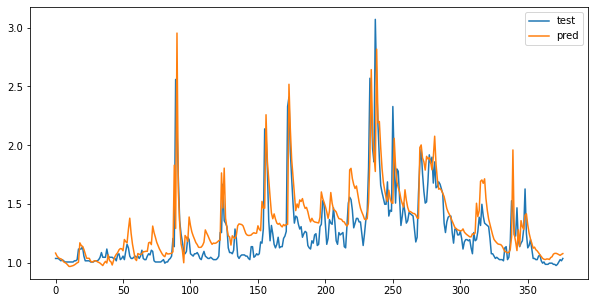

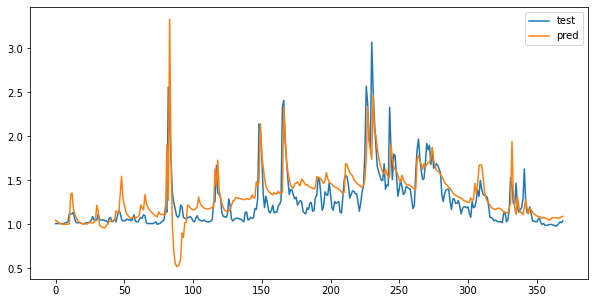

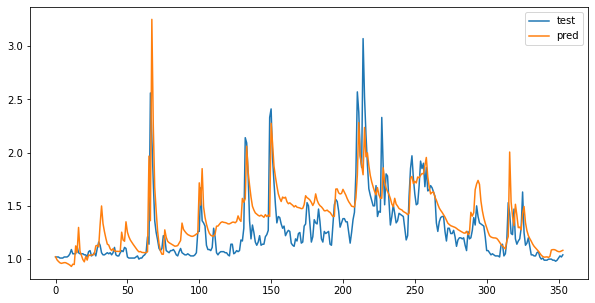

In [311]:
for i in lags:
  model_corr[i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

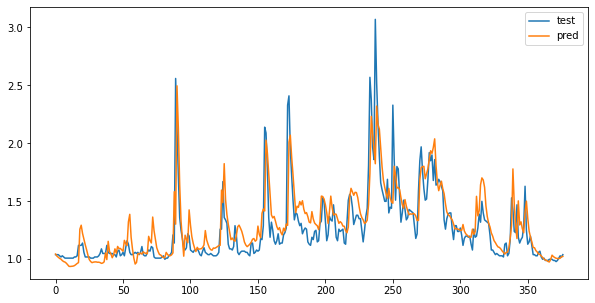

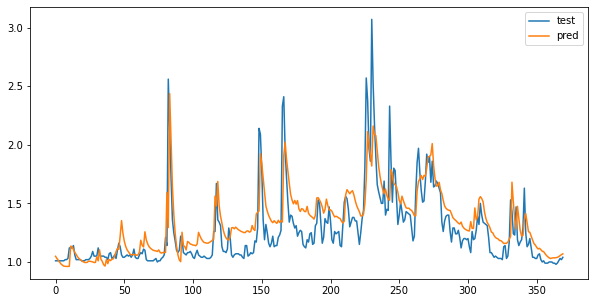

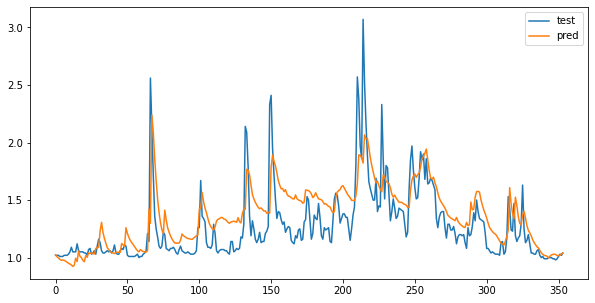

In [344]:
for i in lags:
  model_pca[i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

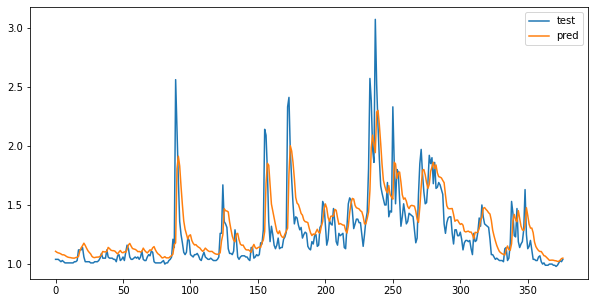

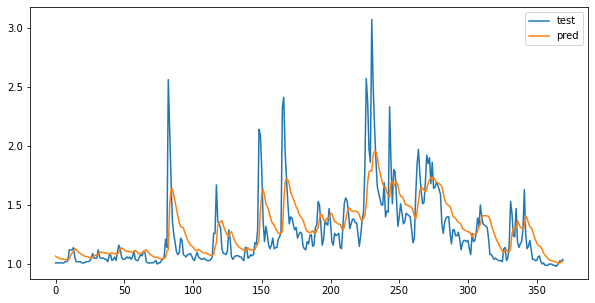

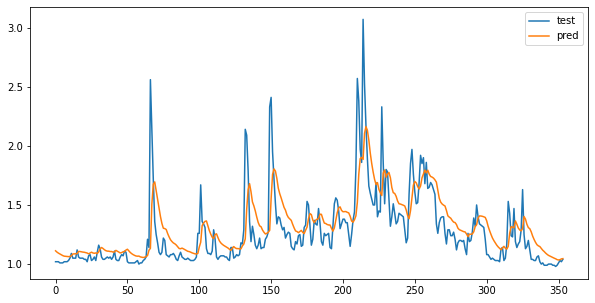

In [55]:
for i in lags:
  model_hydro[i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

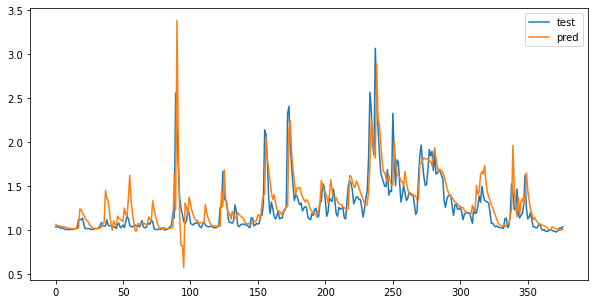

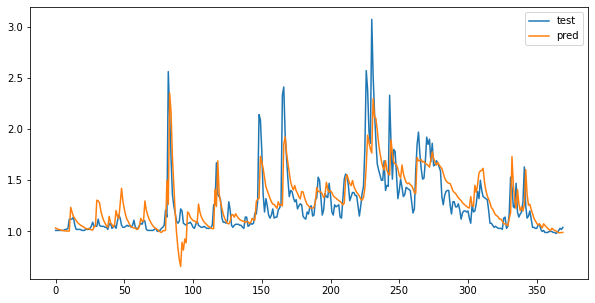

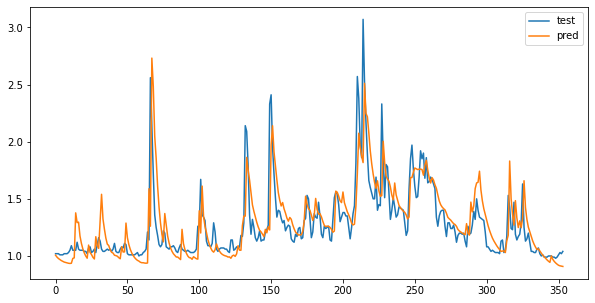

In [93]:
for i in lags:
  model_tree[i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

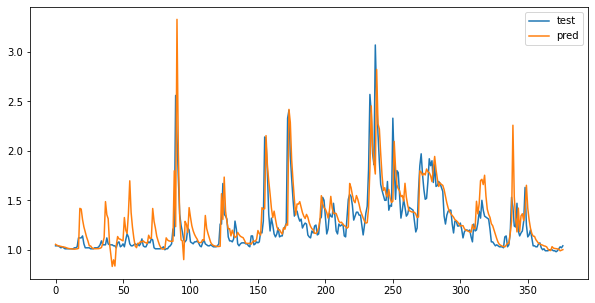

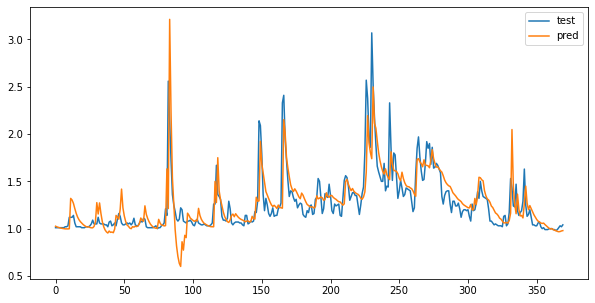

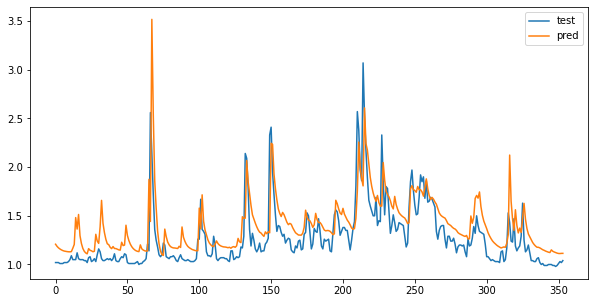

In [124]:
for i in lags:
  model_rfe[i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

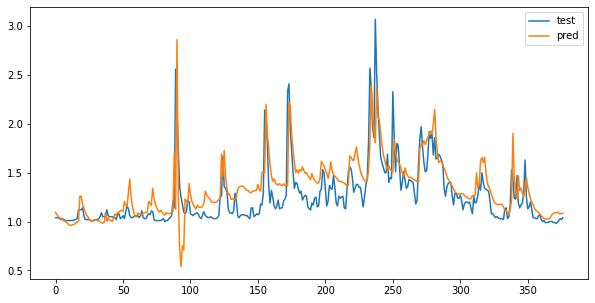

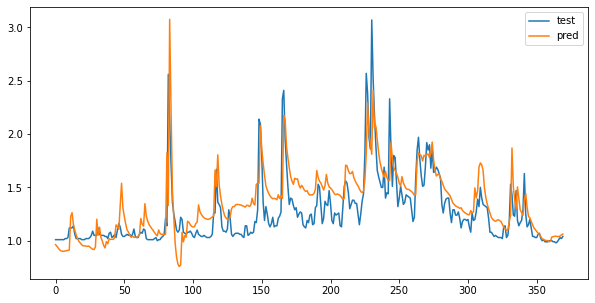

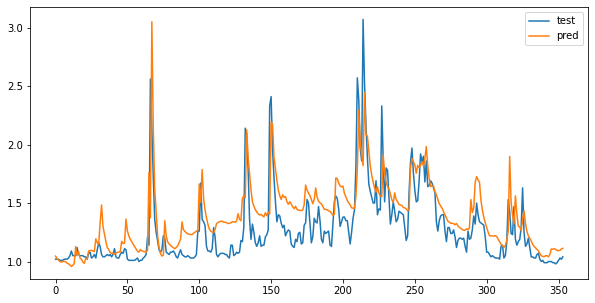

In [150]:
for i in lags:
  model_f[i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

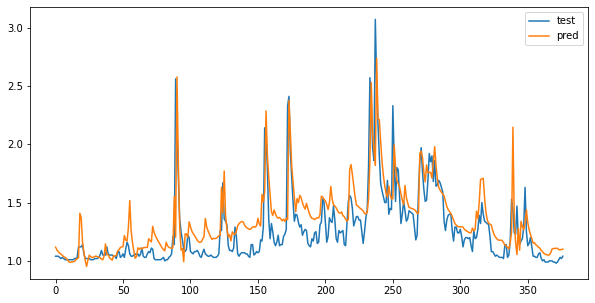

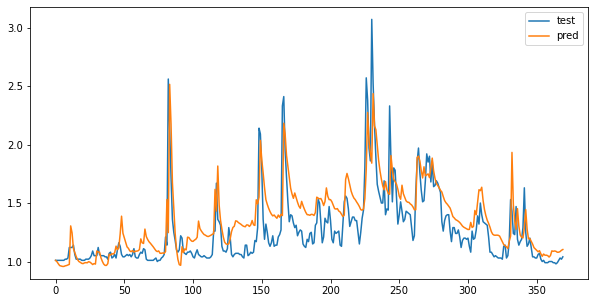

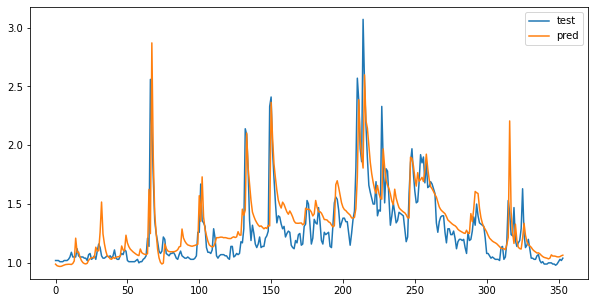

In [160]:
for i in lags:
  model_m[i]['forecast'].plot(y=['test', 'pred'], figsize=(10,5))

# LAKE - non nan EDA

In [ ]:
ls

Aquifer_Auser.csv          kaggle.json
Aquifer_Doganella.csv      Lake_Bilancino.csv
Aquifer_Luco.csv           River_Arno.csv
Aquifer_Petrignano.csv     sample_data/
datasets_description.ods   Water_Spring_Amiata.csv
datasets_description.xlsx  Water_Spring_Lupa.csv
drive/                     Water_Spring_Madonna_di_Canneto.csv


In [ ]:
lake = pd.read_csv('Lake_Bilancino.csv')

In [ ]:
#info = pd.read_excel('datasets_description.xlsx', sheet_name=None)
print(info['Datasets_Description'].iloc[6])
info['Datasets_Feature_Description'][55:62]

Database                                         Lake_Bilancino 
Description    Information about Bilancino Lake. It is an art...
Output                                   Lake_Level, \nFlow_Rate
Name: 6, dtype: object


,AUSER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
55,BILANCINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Field,Format,Description,NaN,NaN,NaN,NaN,NaN
57,Date,Daily Date,Uniquely identifies a day (Primary Key),NaN,NaN,NaN,Code,Values
58,Rainfall_X,Real Number,"It indicates the quantity of rain falling, exp...",NaN,NaN,NaN,X,"Le_Croci, Cavallina, S_Agata, Mangona, S_Piero"
59,Temperature_Y,Real Number,"It indicates the temperature, expressed in °C,...",NaN,NaN,NaN,Y,Le_Croci
60,Flow_Rate,Real Number,"It indicates the lake's flow rate, expressed i...",NaN,NaN,NaN,NaN,NaN
61,Lake_Level,Real Number,"It indicates the river level, expressed in met...",NaN,NaN,NaN,NaN,NaN


In [ ]:
print(info['Datasets_Feature_Description']['Unnamed: 2'][58])
print(info['Datasets_Feature_Description']['Unnamed: 2'][59])
print(info['Datasets_Feature_Description']['Unnamed: 2'][60])
print(info['Datasets_Feature_Description']['Unnamed: 2'][61])

It indicates the quantity of rain falling, expressed in millimeters (mm), in the area X
It indicates the temperature, expressed in °C, detected by the thermometric station Y
It indicates the lake's flow rate, expressed in cubic meters per seconds (mc/s)
It indicates the river level, expressed in meters (m)


In [ ]:
lake.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [ ]:
lake = lake.dropna().reset_index()

In [ ]:
print(lake.shape)

(6025, 10)


In [ ]:
lake.head()

,index,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,578,02/01/2004,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
1,579,03/01/2004,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
2,580,04/01/2004,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
3,581,05/01/2004,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
4,582,06/01/2004,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5


In [ ]:
lake.describe()

,index,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000
mean,3590.000000,2.471635,3.341212,2.670440,2.675187,3.130390,14.530141,249.553472,2.778204
std,1739.412018,6.650488,8.903769,7.167178,7.656404,8.025686,6.944029,2.183334,4.131176
min,578.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.450000
25%,2084.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,247.930000,0.600000
50%,3590.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.240000,1.500000
75%,5096.000000,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.370000,3.000000
max,6602.000000,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


Text(0.5, 1.0, 'Correlation among the variables')

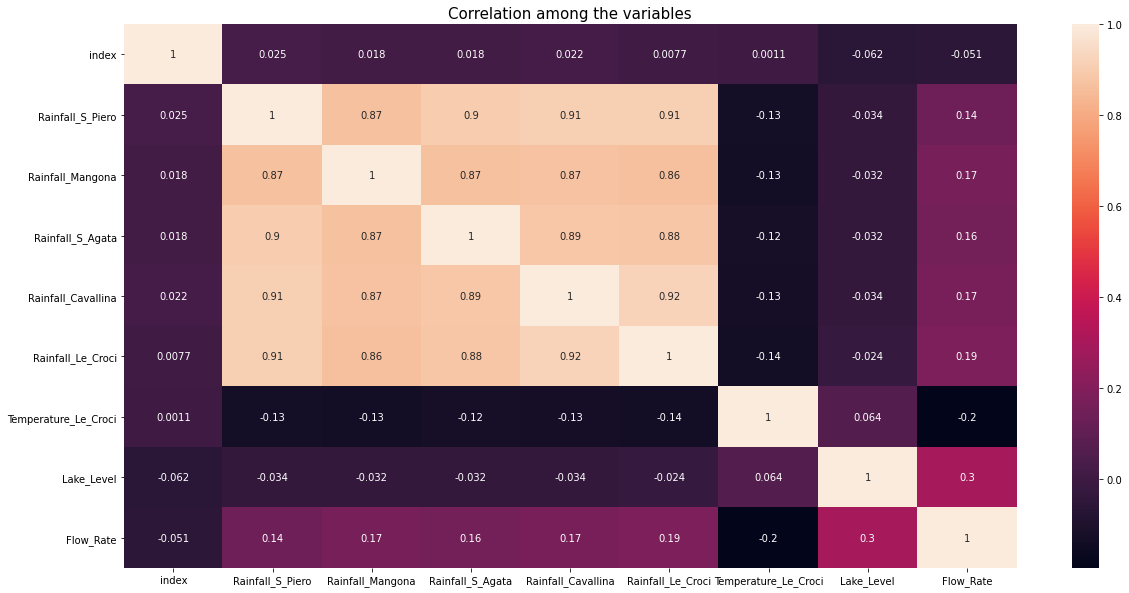

In [ ]:
correlation = lake.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title("Correlation among the variables", size=15)

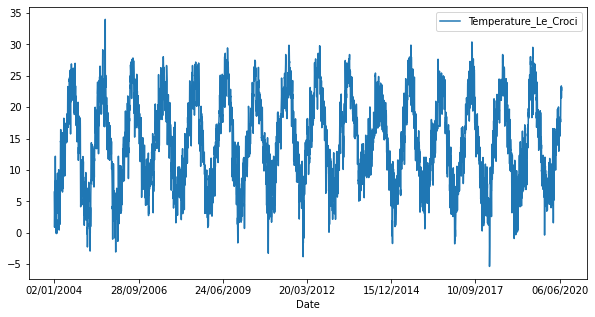

In [ ]:
lake.plot(x='Date', y='Temperature_Le_Croci', kind='line', figsize=(10,5))

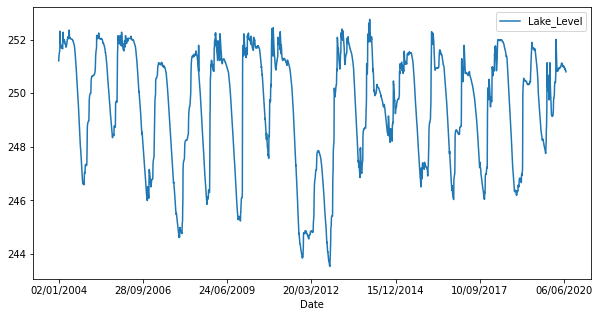

In [ ]:
lake.plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))

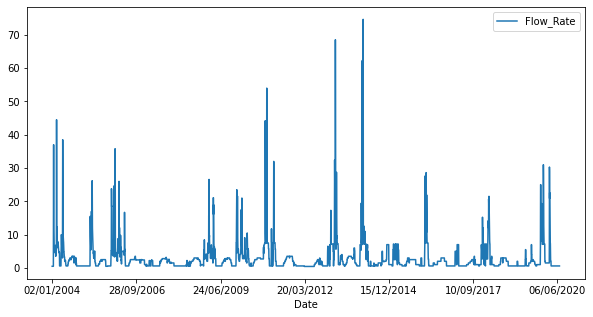

In [ ]:
lake.plot(x='Date', y='Flow_Rate', kind='line', figsize=(10,5))

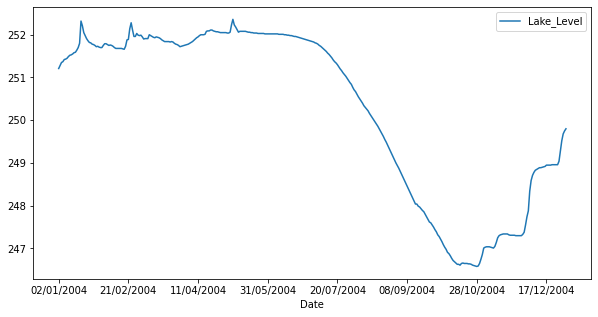

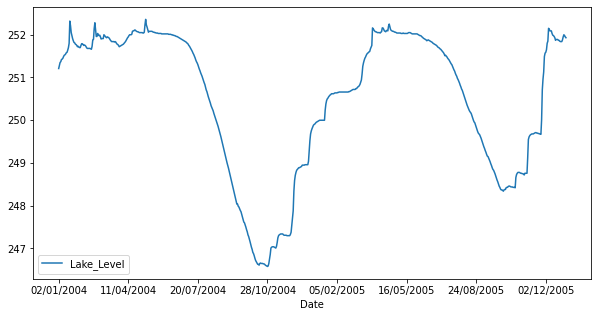

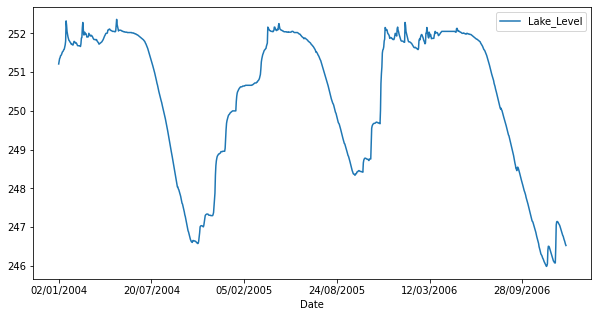

In [ ]:
lake[0:365].plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))
lake[0:730].plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))
lake[0:1095].plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))

In [ ]:
test_hydro=adfuller(lake['Lake_Level'])
for i in test_hydro:
  print(i)
#non stationary

-5.699711266094059
7.726366762783402e-07
27
5997
{'1%': -3.4314408956603097, '5%': -2.8620220755599486, '10%': -2.5670266063699962}
-11659.833479862486


In [ ]:
lake['total_rain'] = lake.iloc[:,2:7].sum(axis=1)

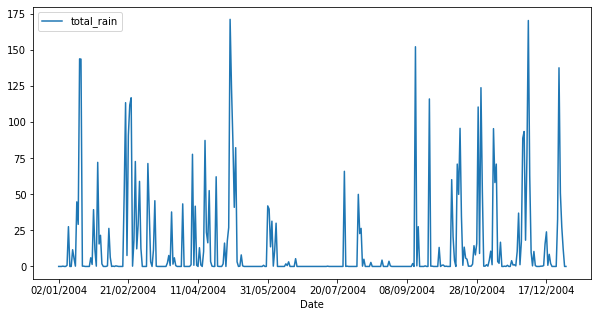

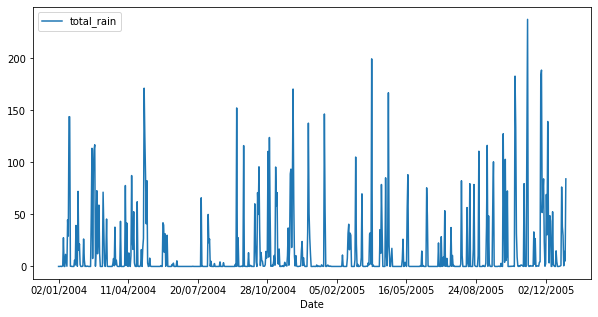

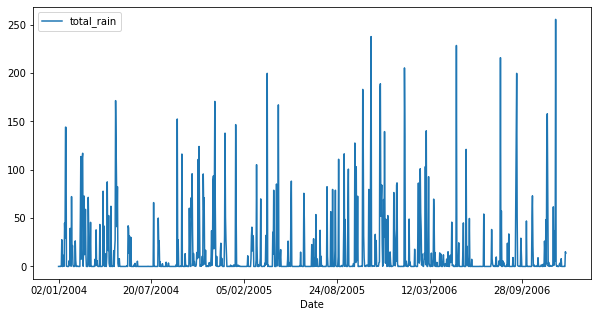

In [ ]:
lake[0:365].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))
lake[0:730].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))
lake[0:1095].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))

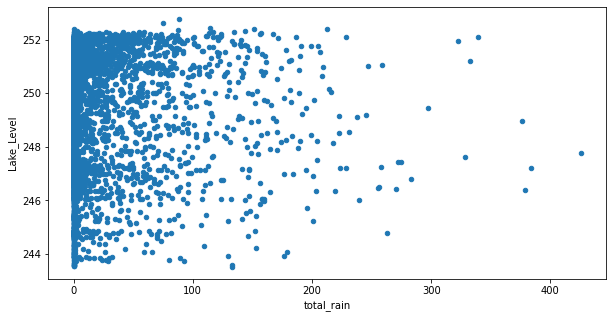

In [ ]:
lake.plot(x='total_rain', y='Lake_Level', kind='scatter', figsize=(10,5))

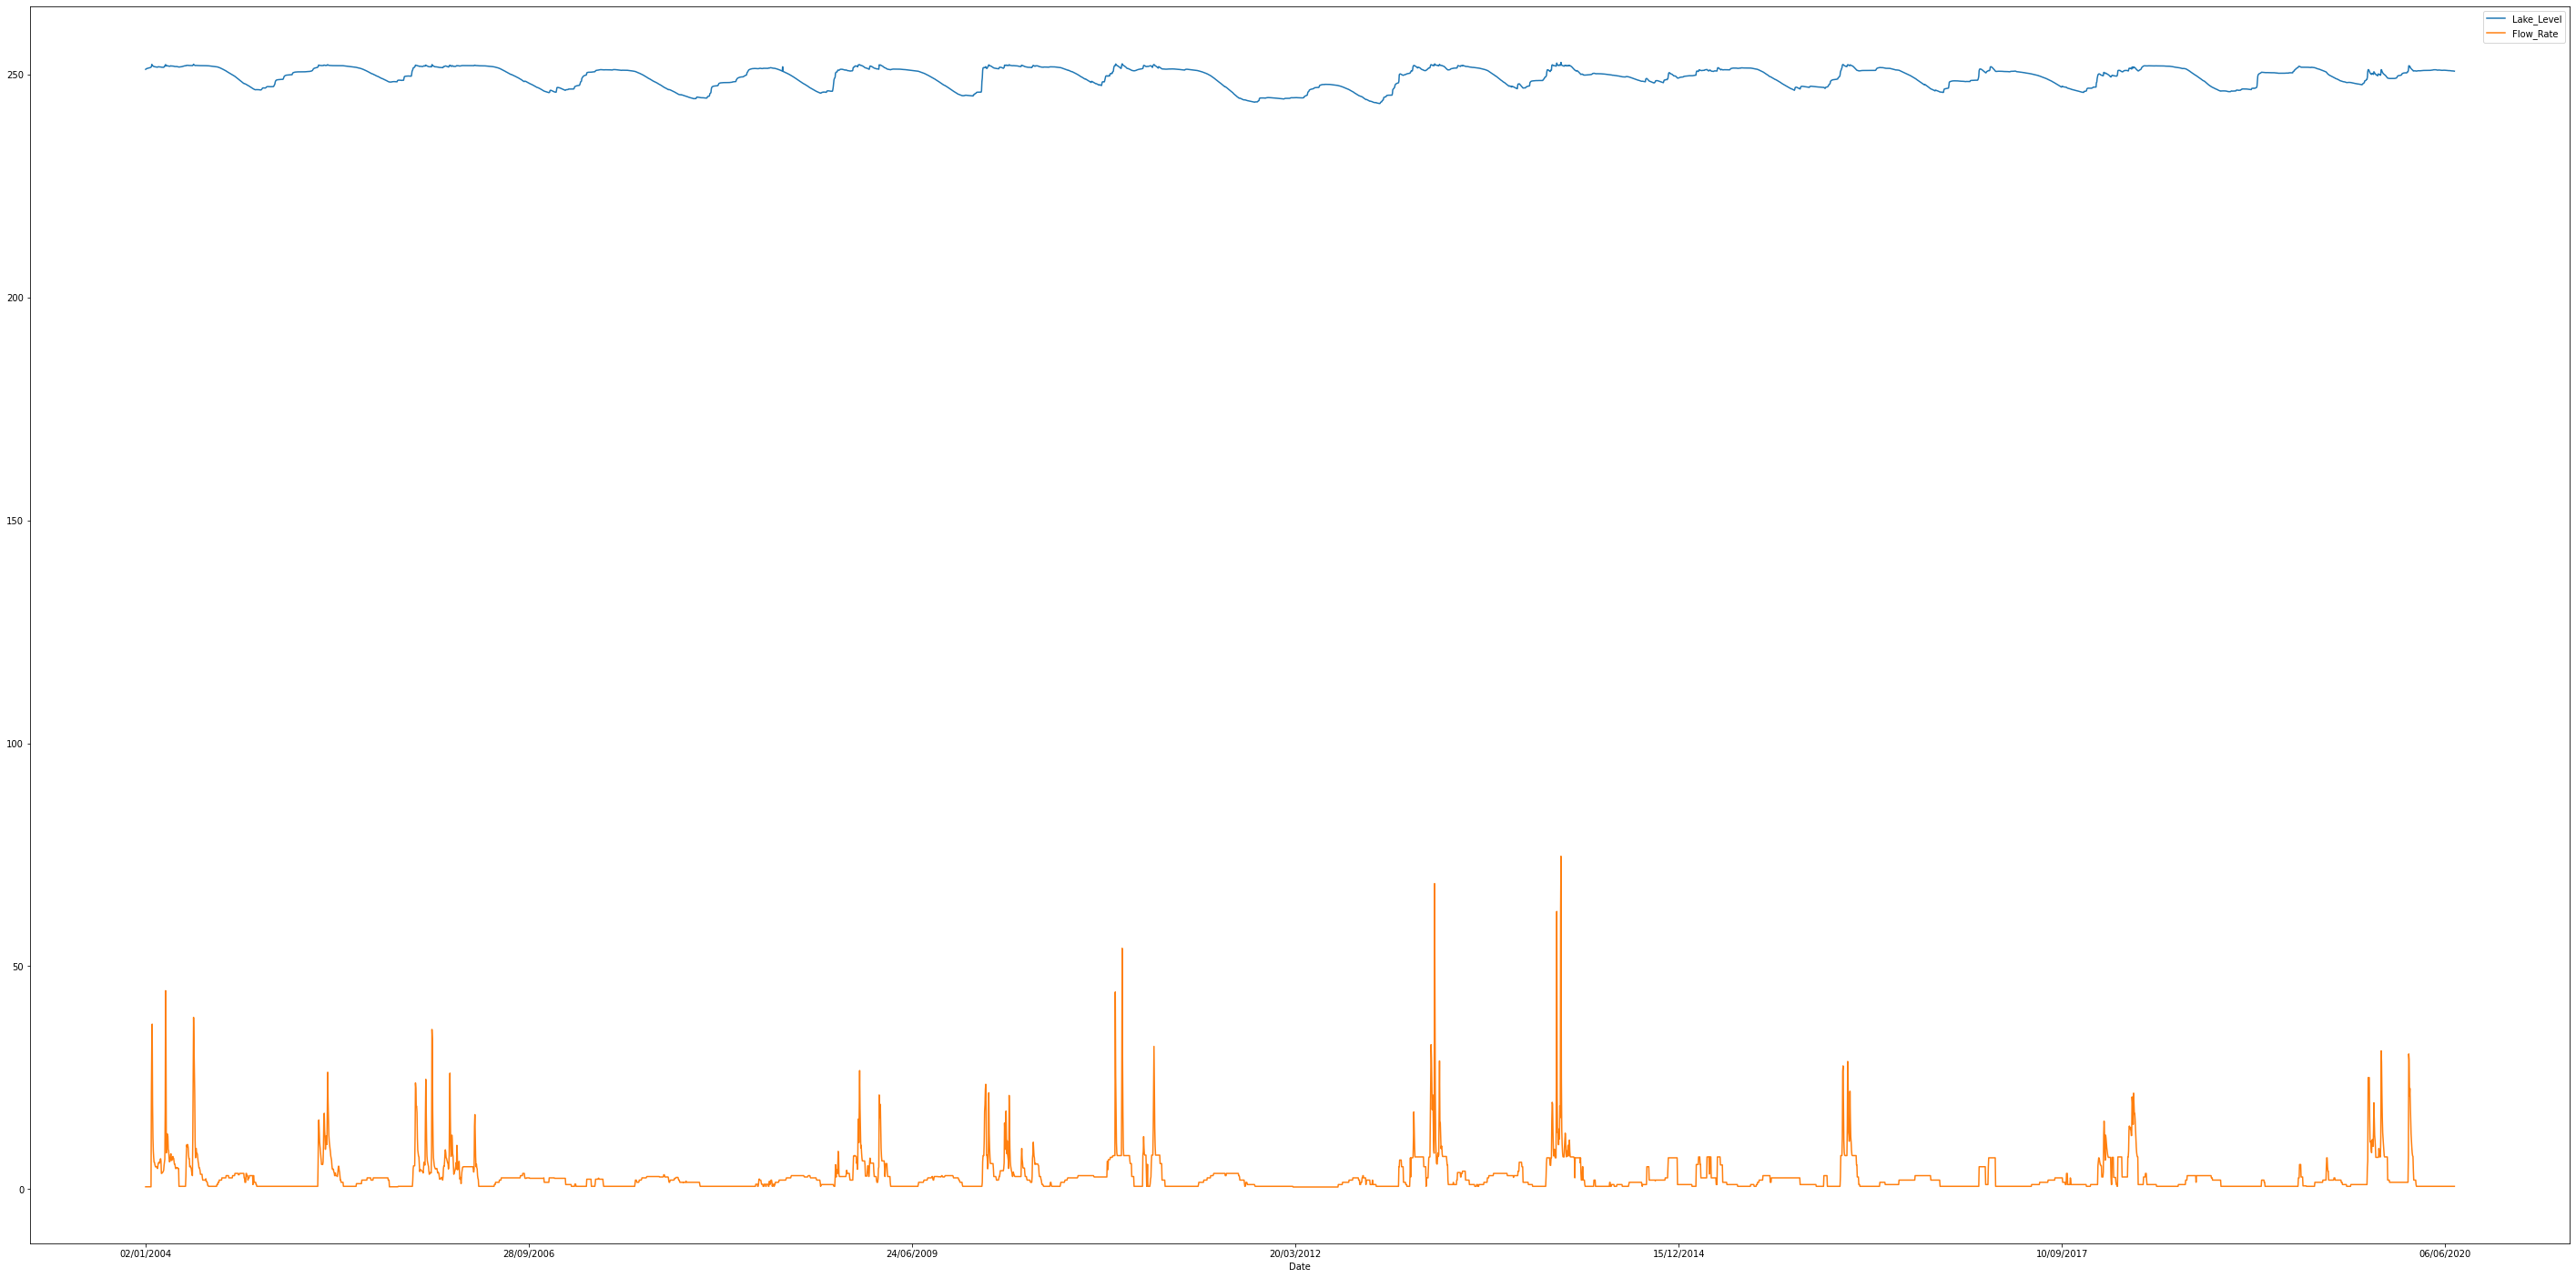

In [ ]:
lake.plot(x='Date', y=['Lake_Level', 'Flow_Rate'], kind='line', figsize=(50,25))

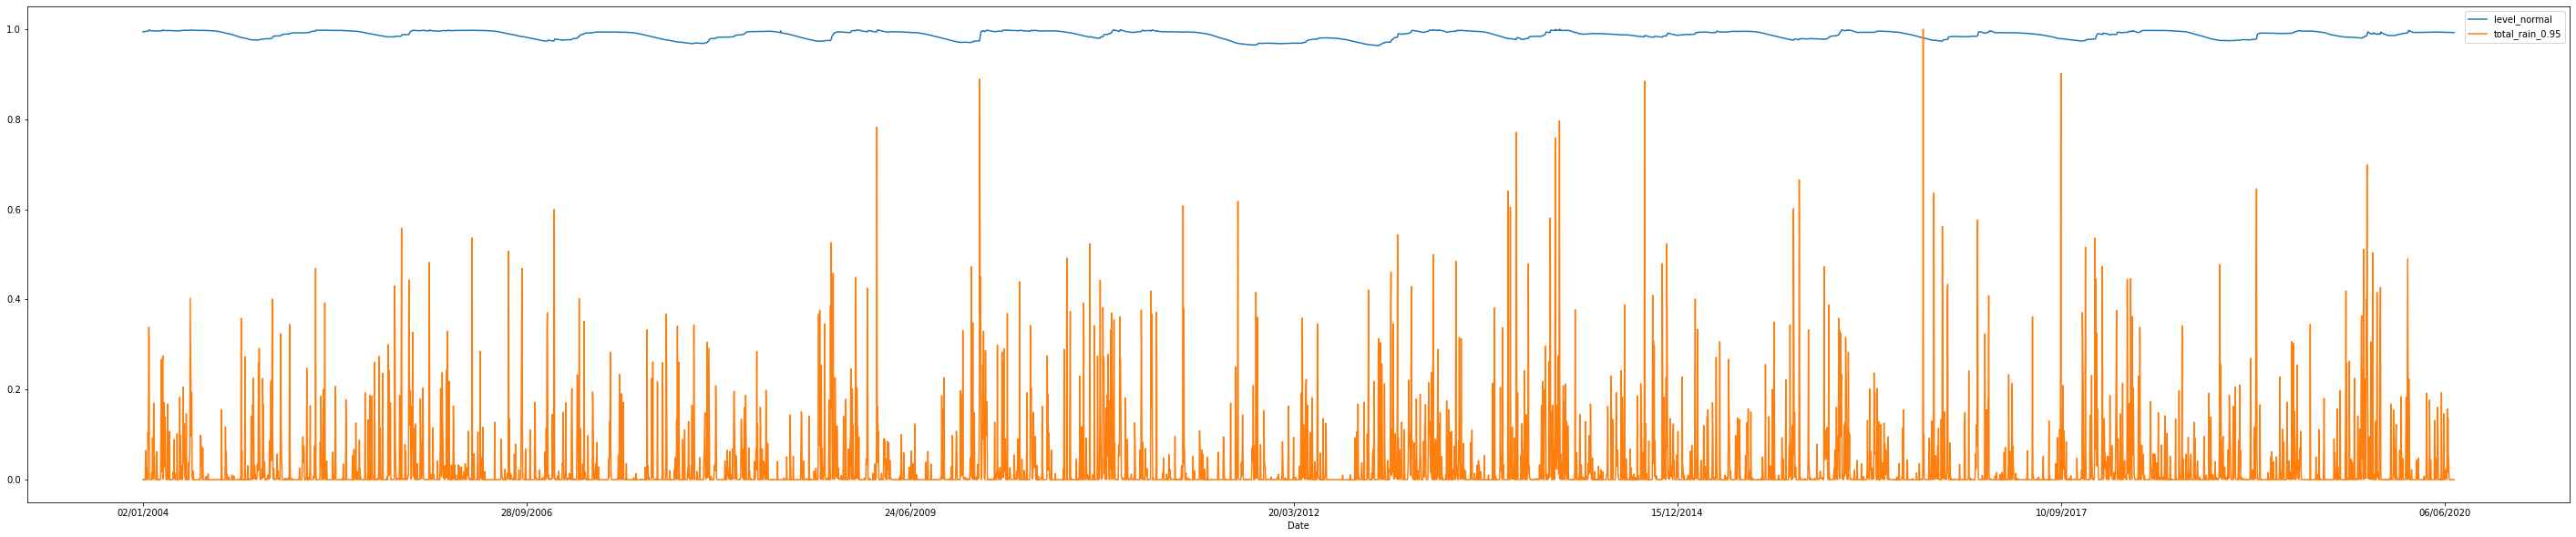

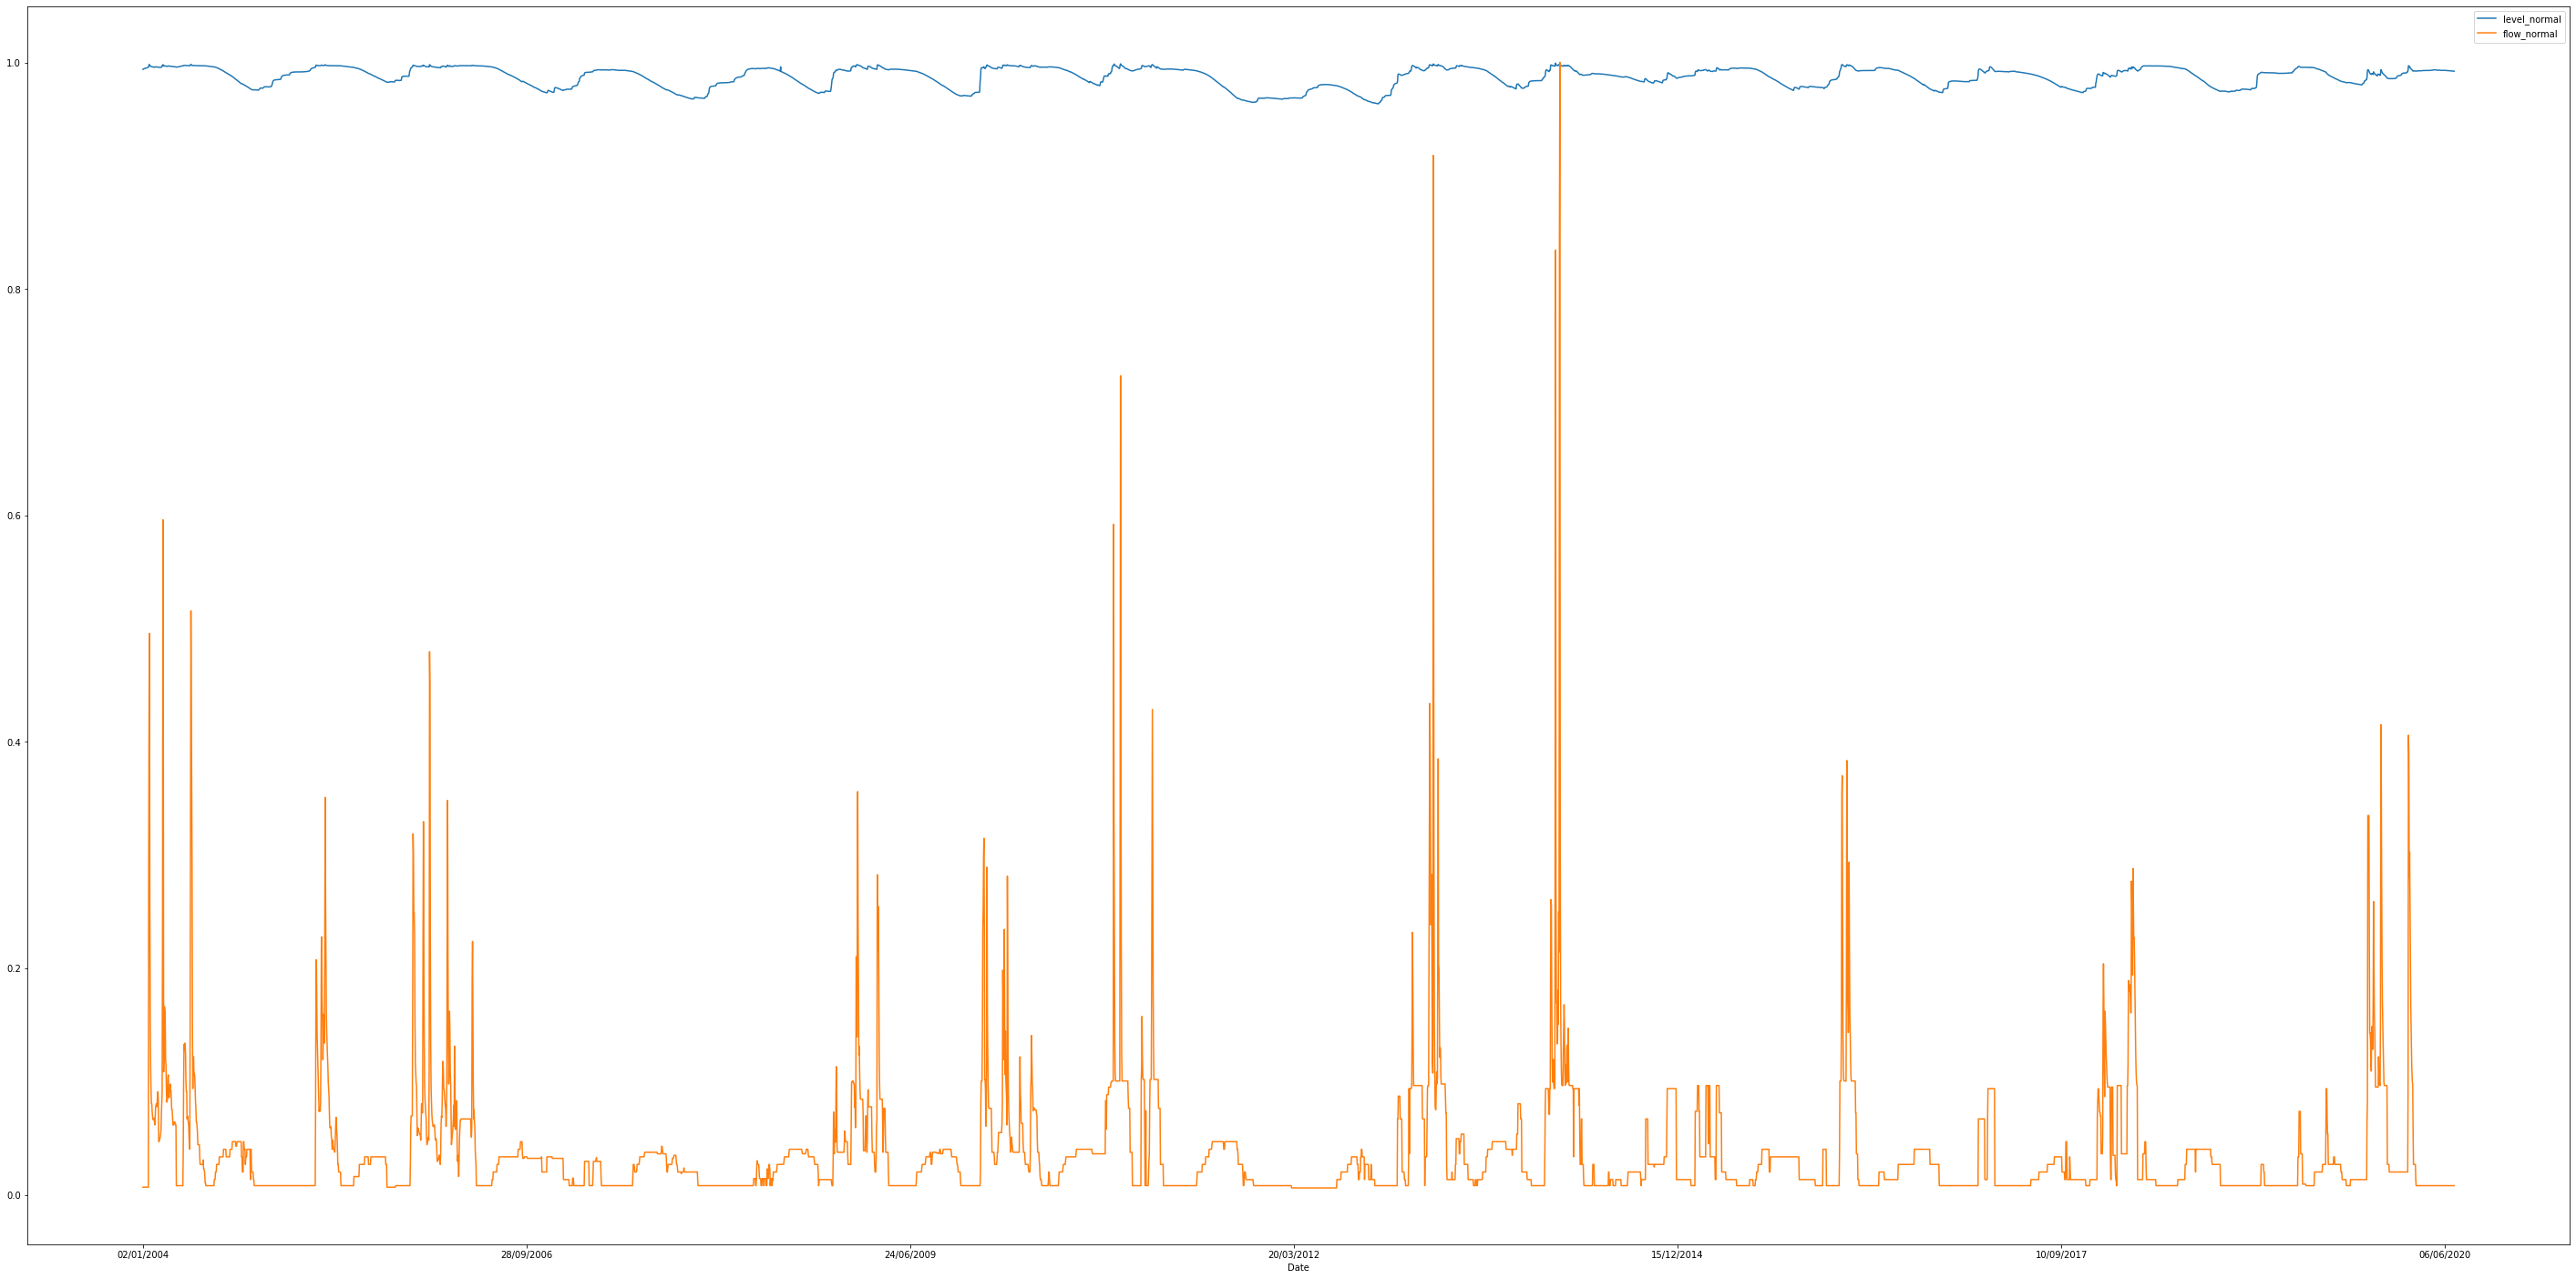

In [ ]:
lake['total_rain_0.95'] = lake['total_rain']/lake.total_rain.quantile(1)
#lake['total_rain_0.75'] = lake['total_rain']/lake.total_rain.quantile(0.75)
lake['level_normal'] = lake['Lake_Level']/lake.Lake_Level.max()
lake['flow_normal'] = lake['Flow_Rate']/lake.Flow_Rate.max()
for i in ['total_rain_0.95']:
  lake.plot(x='Date', y=['level_normal', i]
           , kind='line', figsize=(50,10))
lake.plot(x='Date', y=['level_normal', 'flow_normal'], kind='line', figsize=(50,25))

#SPRING - non nan EDA

In [ ]:
lupa = pd.read_csv('Water_Spring_Lupa.csv')

In [ ]:
madona = pd.read_csv('/content/Water_Spring_Madonna_di_Canneto.csv')

In [ ]:
amiata = pd.read_csv('/content/Water_Spring_Amiata.csv')

In [ ]:
for i in [lupa, madona, amiata]:
  print(i.columns)

Index(['Date', 'Rainfall_Terni', 'Flow_Rate_Lupa'], dtype='object')
Index(['Date', 'Rainfall_Settefrati', 'Temperature_Settefrati',
       'Flow_Rate_Madonna_di_Canneto'],
      dtype='object')
Index(['Date', 'Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta'],
      dtype='object')


#AQUIFER - non nan EDA

In [ ]:
auser = pd.read_csv('/content/Aquifer_Auser.csv')
doga =  pd.read_csv('/content/Aquifer_Doganella.csv')
luco =  pd.read_csv('/content/Aquifer_Luco.csv')
petri =  pd.read_csv('/content/Aquifer_Petrignano.csv')

In [ ]:
for i in [auser, doga, luco, petri]:
  print(i.columns)

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')
Index(['Date', 'Rainfall_Monteporzio', 'Rainfall_Velletri',
       'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Dept